In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [33]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [34]:
tickers1 = ['GCCHX', 'SPYX', 'ESGD']
tickers2 = ['CTEC', 'CRBN', 'EFAX']
tickers3 = ['ETHO', 'FAN']

# These are the tickers we discussed that have data that can be pulled from Alapaca. I havent tried other API's yet. 
tickersfin = ['SPYX', 'CRBN', 'ETHO', 'FAN']

timeframe = "1D"

# Pulling just a year for now to ensure they have usable data: 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Ignore 
esg_data1 = api.get_barset(
    tickers1,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data2 = api.get_barset(
    tickers2,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data3 = api.get_barset(
    tickers3,
    timeframe,
    start=start_date,
    end=end_date
).df

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df



# esg_data1.tail(10)
esg_datafin.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051.0   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735.0   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455.0   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590.0   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608.0   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                            ETHO                                        FAN  \
                            open     high      low    close   volume   open   
time                                                                          
2020-12-31 00:00:00-05:00  53.15  53.1500  52.7550  53.0600   4087.0  23.38   
2021-01-04 00:00:00-05:00  54.02  54.0200  52.1645  52.5500  19072.0  24.10   
2021-01-05 00:00:00-05:00  52.28  53.4300  52.2800  52.9100   4024.0  24.01   
2021-01-06 00:00:00-05:00  52.86  54.9181  52.8600  54.0413  14799.0  24.83   
2021-01-07 00:00:00-05:00  54.36  55.9700  54.3600  55.2321  11929.0  25.80   
2021-01-08 00:00:00-05:00  55.35  55.6600  54.9000  55.3800  17591.0  26.00   
2021-01-11 00:00:00-05:00  55.22  55.4587  55.0000  55.2001   7998.0  25.31   
2021-01-12 00:00:00-05:00  55.33  55.8600  55.3300  55.4300  13497.0  25.21   
2021-01-13 00:00:00-05:00  55.60  55.8000  55.5450  55.7180   8963.0  25.21   
2021-01-14 00:00:00-05:00  56.35  56.3500  55.7100  55.7100  12255.0  25.11   

                                                                SPYX         \
                              high      low   close    volume   open   high   
time                                                                          
2020-12-31 00:00:00-05:00  23.3900  23.2200  23.300  133095.0  92.44  93.03   
2021-01-04 00:00:00-05:00  24.1700  23.8104  23.920  640086.0  93.28  93.28   
2021-01-05 00:00:00-05:00  24.1900  23.9501  24.165  443523.0  91.36  92.21   
2021-01-06 00:00:00-05:00  25.3700  24.6500  25.080  716286.0  91.36  93.29   
2021-01-07 00:00:00-05:00  26.0350  25.6845  26.015  676909.0  93.49  93.99   
2021-01-08 00:00:00-05:00  26.1400  25.7300  25.970  590216.0  94.25  94.25   
2021-01-11 00:00:00-05:00  25.5100  25.1500  25.470  481884.0  94.00  94.07   
2021-01-12 00:00:00-05:00  25.2156  24.9100  25.030  539505.0  93.93  93.93   
2021-01-13 00:00:00-05:00  25.2400  25.1000  25.100  373769.0  93.50  94.06   
2021-01-14 00:00:00-05:00  25.1100  24.8000  24.850  585176.0  94.17  94.17   

                                                    
                               low  close   volume  
time                                                
2020-12-31 00:00:00-05:00  92.2200  93.02  14577.0  
2021-01-04 00:00:00-05:00  90.6400  91.51  40657.0  
2021-01-05 00:00:00-05:00  91.3600  92.05  21952.0  
2021-01-06 00:00:00-05:00  91.3600  92.52  32379.0  
2021-01-07 00:00:00-05:00  93.2500  93.84  37666.0  
2021-01-08 00:00:00-05:00  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  93.3696  93.44  20680.0

In [35]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.013762  119.752519  118.256489  119.227713  1.440453e+04   
std     10.652911    9.781544   12.052323    9.885544  5.954382e+04   
min      0.000000   91.000000    0.000000   89.440000  1.870000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.022000e+03   
50%    117.780000  118.344200  117.380000  117.950000  7.235000e+03   
75%    122.870000  123.320000  122.480000  122.948800  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             ETHO                                                    \
             open        high         low       close        volume   
count  927.000000  927.000000  927.000000  927.000000    927.000000   
mean    37.783031   38.004391   37.390456   37.704943   6676.230852   
std      5.451970    5.307677    5.715126    5.292035   8265.602855   
min      0.000000   29.110000    0.000000   28.604400     11.000000   
25%     34.115000   34.344500   33.744500   34.011500   1990.500000   
50%     36.920000   37.050000   36.699000   36.809100   4024.000000   
75%     40.755000   41.035000   40.446000   40.605250   7861.000000   
max     56.350000   56.350000   55.710000   55.718000  90831.000000   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970208   14.029048   13.888775   13.967938  6.790991e+04   
std      2.369701    2.382852    2.398195    2.372160  1.287429e+05   
min     10.580000   10.590000    0.000000   10.230000  6.600000e+02   
25%     12.820000   12.880000   12.770200   12.830000  1.526950e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.735800e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                    
             open        high         low       close        volume  
count  930.000000  930.000000  930.000000  930.000000     930.00000  
mean    70.507584   70.963874   69.983638   70.554296   23044.64086  
std      9.096652    8.531227    9.330029    8.470279   35072.79512  
min      0.000000   57.130000    0.000000   55.585000     165.00000  
25%     64.731050   65.000000   64.176250   64.670050    5925.75000  
50%     69.115000   69.310000   68.537200   68.895000   11602.00000  
75%     75.307500   75.862600   74.865000   75.235000   25453.50000  
max     94.250000   94.250000   93.410000   94.200000  449801.00000

In [36]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Sim_10 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [37]:
MC_Sim_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.009613  0.992400  0.999863  1.006826  1.003937  0.995253  1.000725   
2     1.009586  0.994144  0.998014  1.010452  1.009744  0.988853  1.006541   
3     1.012814  0.999508  1.000048  1.016917  1.023980  0.990425  1.023543   
4     1.004527  0.998139  0.997206  1.020559  1.029967  0.987712  1.018618   
5     1.005309  0.994789  1.001500  1.013628  1.032741  0.976977  1.014915   
6     1.004569  0.996449  1.002839  1.029556  1.031499  0.990213  1.015703   
7     1.003946  0.996553  1.004708  1.030766  1.035623  0.989354  1.013517   
8     0.996669  0.993621  1.009063  1.024065  1.053920  0.986394  1.011815   
9     0.987780  0.997857  1.008828  1.028115  1.057188  1.001227  1.023859   
10    0.995343  1.002105  1.009694  1.028165  1.052855  1.005190  1.017896   
11    0.990494  1.005843  1.007584  1.022293  1.059941  1.008856  1.014836   
12    0.979586  1.010150  1.013935  1.026270  1.066146  1.015833  1.009183   
13    0.981248  1.001962  1.011175  1.022673  1.066146  1.026647  1.008261   
14    0.983985  1.002051  1.018154  1.016538  1.066379  1.029303  1.005627   
15    0.977734  1.008048  1.015482  1.024686  1.072872  1.018623  1.001329   
16    0.981269  1.002004  1.011957  1.023954  1.080573  1.026001  1.015725   
17    0.992162  1.010206  1.016849  1.033589  1.078332  1.024868  1.006548   
18    0.993371  1.004037  1.019471  1.041950  1.081302  1.024837  1.018497   
19    1.002794  1.001772  1.032282  1.042219  1.090432  1.031705  1.020157   
20    0.998835  0.995596  1.050117  1.045348  1.088493  1.024777  1.020439   
21    0.991752  1.005666  1.042620  1.048716  1.080481  1.025499  1.022904   
22    0.988080  0.997799  1.035490  1.064552  1.077230  1.031234  1.022706   
23    0.974383  0.992664  1.028241  1.068650  1.089111  1.042390  1.025768   
24    0.962690  0.992215  1.034446  1.069390  1.090703  1.048904  1.030623   
25    0.968942  0.994988  1.042507  1.073122  1.103292  1.050737  1.030882   
26    0.956670  0.989265  1.037482  1.074036  1.081737  1.061700  1.031590   
27    0.958796  0.988314  1.036659  1.071035  1.082178  1.062840  1.028506   
28    0.951578  0.986165  1.044269  1.069710  1.072876  1.060809  1.034314   
29    0.956499  0.988463  1.045992  1.069640  1.066954  1.067194  1.034516   
...        ...       ...       ...       ...       ...       ...       ...   
2491  5.292888  8.282009  5.668927  5.448705  3.677677  3.179162  6.361549   
2492  5.271582  8.229585  5.699762  5.394309  3.655192  3.173740  6.407542   
2493  5.299938  8.235740  5.663936  5.395907  3.679290  3.182213  6.426321   
2494  5.307343  8.250323  5.686096  5.369847  3.653357  3.194423  6.416393   
2495  5.280331  8.188883  5.663262  5.367746  3.628644  3.190826  6.433602   
2496  5.241906  8.212083  5.788105  5.425204  3.582062  3.176803  6.441529   
2497  5.230594  8.107950  5.718233  5.378995  3.543752  3.182148  6.454146   
2498  5.282218  8.161779  5.714789  5.426199  3.598443  3.193966  6.407252   
2499  5.292053  8.249858  5.775653  5.373981  3.585735  3.218283  6.472922   
2500  5.297964  8.384629  5.771827  5.347225  3.559663  3.247500  6.481401   
2501  5.332961  8.339706  5.725351  5.357495  3.555941  3.258599  6.433591   
2502  5.316570  8.365858  5.767107  5.304622  3.532690  3.299457  6.472438   
2503  5.306097  8.416029  5.825785  5.276043  3.508858  3.305252  6.518821   
2504  5.336760  8.450227  5.878475  5.329271  3.515241  3.326818  6.543391   
2505  5.468678  8.520295  5.912479  5.315125  3.506240  3.323503  6.606174   
2506  5.492609  8.503936  5.976702  5.334399  3.511377  3.353670  6.623440   
2507  5.458657  8.508275  6.015189  5.389427  3.490788  3.330609  6.705052   
2508  5.508115  8.504909  5.987075  5.393032  3.476896  3.323013  6.729632   
2509  5.495206  8.538838  5.956546  5.416444  3.430647  3.313260  6.642477   
2510  5.480613  8.611575  5.96236

In [38]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_Sim_10.simulated_return.mean(axis=1)),
    "median": list(MC_Sim_10.simulated_return.median(axis=1)),
    "min": list(MC_Sim_10.simulated_return.min(axis=1)),
    "max": list(MC_Sim_10.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_10 = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns_10.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000580  1.000591  0.983214  1.020969
2  1.000742  1.000591  0.973900  1.029692
3  1.001390  1.001176  0.964465  1.043900
4  1.002054  1.002294  0.958375  1.044687

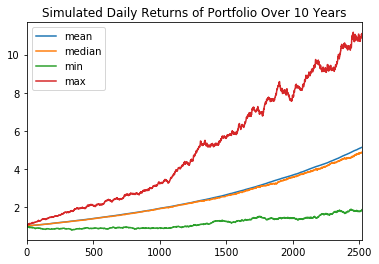

In [39]:
df_simulated_returns_10.plot(title="Simulated Daily Returns of Portfolio Over 10 Years")

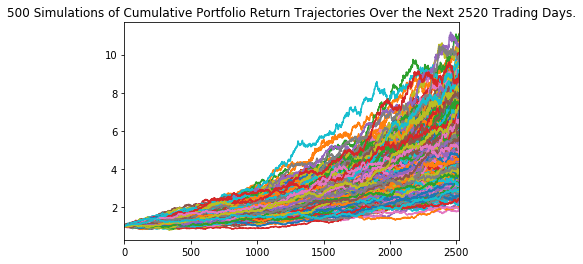

In [40]:
 # Plot simulation outcomes
line_plot = MC_Sim_10.plot_simulation()

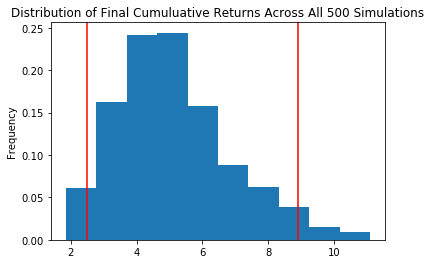

In [41]:
dist_plot = MC_Sim_10.plot_distribution()

In [42]:
sim_10_table = MC_Sim_10.summarize_cumulative_return()

print(sim_10_table)

count           500.000000
mean              5.125266
std               1.725427
min               1.846576
25%               3.834621
50%               4.869605
75%               6.084679
max              11.100773
95% CI Lower      2.482772
95% CI Upper      8.898646
Name: 2520, dtype: float64


In [43]:
Sim_10_lower = round(sim_10_table[8]*10000,2)
Sim_10_upper = round(sim_10_table[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${Sim_10_lower} and ${Sim_10_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $24827.72 and $88986.46.
